<a href="https://colab.research.google.com/github/priyanka742/machine_learning/blob/main/Q3_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

binary logistic regression

Number of Iterations: 34


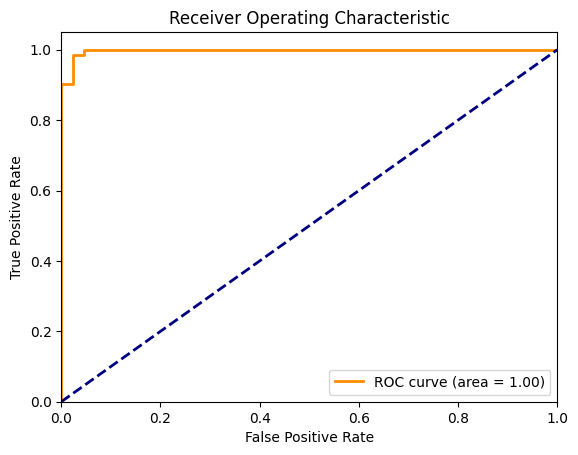

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

num_iterations = model.n_iter_[0]

y_pred = model.predict(X_test_scaled)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"Number of Iterations: {num_iterations}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

multi class logistic regression*

Limited-memory: L-BFGS uses a limited amount of memory to store information about the past iterations. This makes it suitable for problems with a large number of parameters where storing the full Hessian matrix would be impractical.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load Data from File:

In [4]:

# Load the data from the CSV file
data = pd.read_csv("new1.csv")

# Separate features (X) and multi-class labels (y)
X = data.iloc[:, :-1]  # Use the correct column name for features
y = data['age']     # Use the correct column name for class labels

Split the Data into Training and Testing Sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale the Data

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Create and Train the Multi-Class Logistic Regression Model:

In [7]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
Make Predictions

In [8]:

y_pred = model.predict(X_test_scaled)

Evaluate the Model

In [9]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.00
Confusion Matrix:
[[0 1 0]
 [0 0 0]
 [0 1 0]]
Classification Report:
              precision    recall  f1-score   support

          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Plot the Confusion Matrix

KeyError: ignored

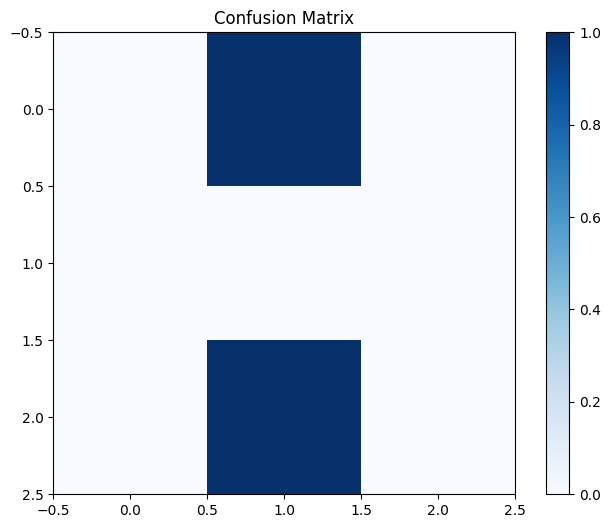

In [10]:

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(np.arange(len(data['class'].unique())), data['class'].unique(), rotation=45)
plt.yticks(np.arange(len(data['class'].unique())), data['class'].unique())

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<ipython-input-11-ea991589852e>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=cmap, edgecolor='black', s=50)


ValueError: ignored

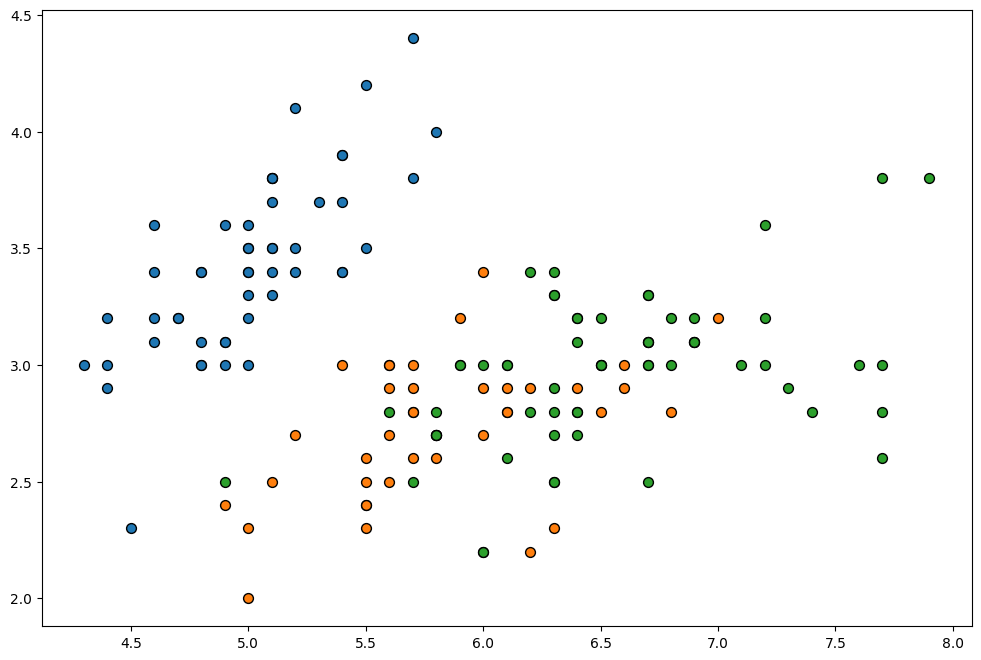

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model for multi-class classification
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot decision boundaries for all four features
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('viridis')
for i, target_name in enumerate(data.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=cmap, edgecolor='black', s=50)

# Create meshgrid for all four features
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries for all four features
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Logistic Regression Decision Boundaries (All Four Features)")
plt.legend(loc='upper right')

# Show the plot
plt.show()
